<a href="https://colab.research.google.com/github/MamontLara/Python_for_data_analyst_homeworks/blob/main/%22hw_6_3_%D0%9F%D0%B5%D1%80%D0%B5%D0%B2%D1%96%D1%80%D0%BA%D0%B0_%D0%B2%D0%B8%D0%B1%D1%96%D1%80%D0%BA%D0%B8_%D0%BD%D0%B0_%D0%BD%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D1%96%D1%81%D1%82%D1%8C%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнє завдання на тему "Перевірка вибірки на нормальність"

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


0.Зчитайте дані з `data.csv` та запишіть значення колонки data у форматі np.ndarray в змінну data. Ми будемо далі працювати з цією змінною.

In [2]:
import pandas as pd


In [3]:
data = pd.read_csv('drive/MyDrive/Dataset/data.csv', index_col=0).data.values

Запустіть код нижче. Для коректної робити всіх подальших методів дані мають бути у вигляді одновимірного вектора, тобто мати розмір (100,).

In [4]:
data.shape

(100,)

## Перевірка вибірки на нормальність

1.**Візуалізація розподілу**

Подивимось спершу на розподіл наших даних. Для цього побудуємо розподіл даних (графік на вигляд як гістограма, тільки він нормований так, аби сума під кривою була рівна 1), а на нього накладемо лінійний графік щільності (PDF - для побудови використовуємо `scipy.stats.norm.pdf(...)`) теоретичного нормального розподілу з середнім та стандартним відхиленням як у наших даних.

Візуалізацію будуємо за аналогією прикладу, що наводився у лекції, коли ми будували кілька кривих щільності для одних і тих самих даних, тільки значно більш спрощено, бо розподіл для порівняння у нас лише один - нормальний.

Побудуйте графік як наведено в очікуваному результаті та напишіть ваш висновок, чи схоже, що дані розподілені нормально?

Підказка: весь графік будується за 6 рядків коду, три з яких - підписи осей і графіку. Аби побудувати лінійний графік функції щільності та він наклався на гістограму, необхідно задати значення іксів з діапазону значень наших даних. Ці значення вже задані для вас, залишилось дописати 5 рядочків коду :)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [6]:
mean = np.mean(data)
std_dev = np.std(data)

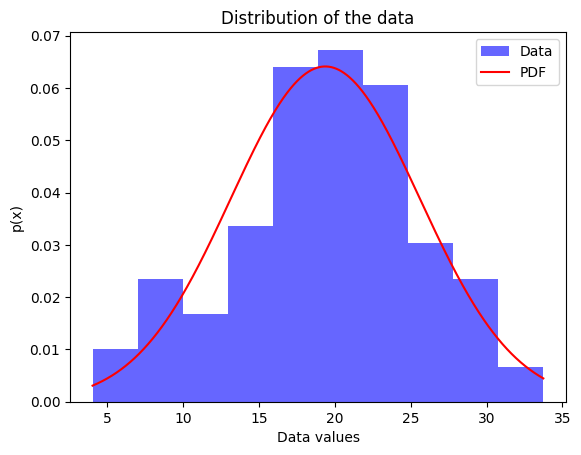

In [7]:
x_axis = np.arange(data.min(), data.max(), 0.01)

plt.hist(data, bins=10, density=True, alpha=0.6, color='b', label='Data')

# PDF, написала тут окремо, щоб не заплутатись
# pdf = stats.norm.pdf(x_axis, mean, std_dev)

plt.plot(x_axis, stats.norm.pdf(x_axis, mean, std_dev), 'r', label='PDF')

plt.legend()
plt.title('Distribution of the data')
plt.xlabel('Data values'), plt.ylabel('p(x)')
plt.show()

З графіку бачимо, що дані наближаються до нормального розподілу, але все ж не є повністю симетричними. Праворуч візуально спостерігається більше даних, що вказує на асиметрію, медіана також дещо зміщена вправо. Це свідчить про можливу правосторонню асиметрію в даних, що може вплинути на подальший аналіз.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1SB_HOIgwfZXrtglBBlDfMYjg2eGGBSIX)


2.**QQ графік**

Ще одним візуалізаційним методом перевірки розподілу вибірки даних на нормальність є графік квантиль-квантиль, Q-Q графік або QQ графік. У лекції ми розбирали, що це за графік, та як його інтерпретувати.

Побудуйте QQ-Plot для порівняння з нормальним розподілом наших даних та напишіть висновок з графіку, чи можна сказати, що дані розподілені за нормальним законом?

In [8]:
sorted_data = sorted(data)

In [9]:
from scipy.stats import probplot

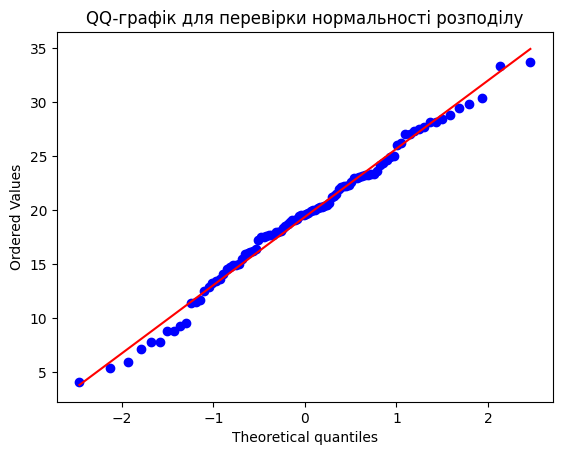

In [12]:
probplot(data, dist="norm", plot=plt)
plt.title("QQ-графік для перевірки нормальності розподілу")
plt.show()
#чи правильно я зрозуміла, що тут просто все вже закладено у побудову та мені не потрібно там сортувати, розподіляти на квантилі і т.д.

З QQ-графіка можна зробити висновок, що дані в цілому наближаються до нормального розподілу, однак спостерігаються певні відхилення точок на початку розподілу, а також незначне відхилення в кінці. Це може свідчити про те, що дані мають легке асиметричне або екстремальне розподілення. Вцілому, більшість точок розташовані близько до діагональної лінії, що вказує на те, що основна частина даних відповідає нормальному розподілу.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1-eDd16OVgqEjzFUBjJJzSMcwSrzNNm_V)

3.**Тест Шапіро-Вілка**

Тест Шапіро-Вілка визначає для вибірки, наскільки ймовірно, що вона була витягнута з нормального розподілу.
Нульова гіпотеза H0 тесту Шапіро-Вилка полягає в тому, що випадкова величина, вибірка якої відома, розподілена за нормальним законом. Альтернативна гіпотеза H1 полягає в тому, що закон розподілу **не** є нормальним.

**Задача**: протестувати нашу вибірку на нормальність з допомогою теcта Шапіро-Вілка, реалізованого в функцію [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html). Висновок зробіть на основі аналізу p-значення. На рівні значущості = 0.05 чи можемо ми відхилити гіпотезу Н0? Відповідь можна надати текстом, або написати простий if-else блок для виведення висновку спираючись на отримане p-значення. Нагадування:
- p <= alpha: відхиляємо H0.
- p > alpha: не можемо відхилити H0.

Також пропоную вам переглянути оце [відео](https://youtu.be/eh9eYLBecWk), тут розказується про QQ графік, тест Шапіро, та звʼязок між ними.


In [14]:
from scipy.stats import shapiro

In [17]:
stat, p_value_shapiro = shapiro(data)
print("Статистика тесту:", stat)
print("P-значення:", p_value_shapiro)
if p_value_shapiro > 0.05:
    print("За результатами тесту Шапіро-Вілка дані мають нормальний розподіл: не можемо відхилити H0.")
else:
    print("За результатами тесту Шапіро-Вілка дані не мають нормального розподілу: відхиляємо H0.")

Статистика тесту: 0.9887855685963715
P-значення: 0.5677973106978921
За результатами тесту Шапіро-Вілка дані мають нормальний розподіл: не можемо відхилити H0.
